# FAA Project - Part Two 

## Load Packages

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_column', None)
%matplotlib Inline

## Load in data

In [64]:
df = pd.read_csv('combined_data.csv')
df.drop(columns='Unnamed: 0', inplace=True)

In [65]:
df.head()

,ENROLID,YEAR_x,AGE_x,DX1_x,DX2_x,DX3_x,DX4_x,DX5_x,DX6_x,DX7_x,DX8_x,DX9_x,DX10_x,DX11_x,DX12_x,DX13_x,DX14_x,DX15_x,SEX,YEAR_y,AGE_y,DX1_y,DX2_y,DX3_y,DX4_y,DX5_y,DX6_y,DX7_y,DX8_y,DX9_y,DX10_y,DX11_y,DX12_y,DX13_y,DX14_y,DX15_y,NDCNUM,PRODNME
0,131842101,2019.0,54.0,K7469,I8511,K2951,K766,R188,M79605,R05,R1900,I8500,E876,R0602,Z9049,F17210,K922,I10,2.0,2020.0,55.0,M19212,E119,E6601,K7460,Z6841,M19012,G8918,G35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93310905,AMOXICILLIN
1,131842101,2019.0,54.0,K7469,I8511,K2951,K766,R188,M79605,R05,R1900,I8500,E876,R0602,Z9049,F17210,K922,I10,2.0,2020.0,55.0,M19212,E119,E6601,K7460,Z6841,M19012,G8918,G35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93312501,DICLOXACILLIN SODIUM
2,131842101,2019.0,54.0,K7469,I8511,K2951,K766,R188,M79605,R05,R1900,I8500,E876,R0602,Z9049,F17210,K922,I10,2.0,2020.0,55.0,M19212,E119,E6601,K7460,Z6841,M19012,G8918,G35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121057716,LACTULOSE
3,131842101,2019.0,54.0,K7469,I8511,K2951,K766,R188,M79605,R05,R1900,I8500,E876,R0602,Z9049,F17210,K922,I10,2.0,2020.0,55.0,M19212,E119,E6601,K7460,Z6841,M19012,G8918,G35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378020810,FUROSEMIDE
4,131842101,2019.0,54.0,K7469,I8511,K2951,K766,R188,M79605,R05,R1900,I8500,E876,R0602,Z9049,F17210,K922,I10,2.0,2020.0,55.0,M19212,E119,E6601,K7460,Z6841,M19012,G8918,G35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378021610,FUROSEMIDE


In [66]:
df.describe()

,ENROLID,YEAR_x,AGE_x,SEX,YEAR_y,AGE_y,NDCNUM
count,1.574047e+06,1574047.0,1.574047e+06,1.574047e+06,1574047.0,1.574047e+06,1.574047e+06
mean,1.026642e+09,2019.0,4.624951e+01,1.580384e+00,2020.0,4.724608e+01,4.015517e+10
std,4.657828e+08,0.0,1.575282e+01,4.934963e-01,0.0,1.577052e+01,2.783111e+10
min,1.318421e+08,2019.0,0.000000e+00,1.000000e+00,2020.0,0.000000e+00,6.901350e+07
25%,6.567922e+08,2019.0,3.600000e+01,1.000000e+00,2020.0,3.700000e+01,8.290310e+09
50%,1.070026e+09,2019.0,5.200000e+01,2.000000e+00,2020.0,5.300000e+01,5.122401e+10
75%,1.361621e+09,2019.0,5.900000e+01,2.000000e+00,2020.0,6.000000e+01,6.586204e+10
max,1.911431e+09,2019.0,6.400000e+01,2.000000e+00,2020.0,6.500000e+01,8.113103e+10


In [18]:
df.shape

(1574047, 38)

## Data Basic Infomation

In [19]:
# drop NDCNUM duplicates
df = df.drop_duplicates(subset = ['NDCNUM'],keep='first')

In [20]:
df.shape

(16018, 38)

In [21]:
df.head()

,ENROLID,YEAR_x,AGE_x,DX1_x,DX2_x,DX3_x,DX4_x,DX5_x,DX6_x,DX7_x,DX8_x,DX9_x,DX10_x,DX11_x,DX12_x,DX13_x,DX14_x,DX15_x,SEX,YEAR_y,AGE_y,DX1_y,DX2_y,DX3_y,DX4_y,DX5_y,DX6_y,DX7_y,DX8_y,DX9_y,DX10_y,DX11_y,DX12_y,DX13_y,DX14_y,DX15_y,NDCNUM,PRODNME
0,131842101,2019.0,54.0,K7469,I8511,K2951,K766,R188,M79605,R05,R1900,I8500,E876,R0602,Z9049,F17210,K922,I10,2.0,2020.0,55.0,M19212,E119,E6601,K7460,Z6841,M19012,G8918,G35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93310905,AMOXICILLIN
1,131842101,2019.0,54.0,K7469,I8511,K2951,K766,R188,M79605,R05,R1900,I8500,E876,R0602,Z9049,F17210,K922,I10,2.0,2020.0,55.0,M19212,E119,E6601,K7460,Z6841,M19012,G8918,G35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93312501,DICLOXACILLIN SODIUM
2,131842101,2019.0,54.0,K7469,I8511,K2951,K766,R188,M79605,R05,R1900,I8500,E876,R0602,Z9049,F17210,K922,I10,2.0,2020.0,55.0,M19212,E119,E6601,K7460,Z6841,M19012,G8918,G35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121057716,LACTULOSE
3,131842101,2019.0,54.0,K7469,I8511,K2951,K766,R188,M79605,R05,R1900,I8500,E876,R0602,Z9049,F17210,K922,I10,2.0,2020.0,55.0,M19212,E119,E6601,K7460,Z6841,M19012,G8918,G35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378020810,FUROSEMIDE
4,131842101,2019.0,54.0,K7469,I8511,K2951,K766,R188,M79605,R05,R1900,I8500,E876,R0602,Z9049,F17210,K922,I10,2.0,2020.0,55.0,M19212,E119,E6601,K7460,Z6841,M19012,G8918,G35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378021610,FUROSEMIDE


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16018 entries, 0 to 1573601
Data columns (total 38 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ENROLID  16018 non-null  int64  
 1   YEAR_x   16018 non-null  float64
 2   AGE_x    16018 non-null  float64
 3   DX1_x    16018 non-null  object 
 4   DX2_x    15816 non-null  object 
 5   DX3_x    15609 non-null  object 
 6   DX4_x    15385 non-null  object 
 7   DX5_x    15018 non-null  object 
 8   DX6_x    14438 non-null  object 
 9   DX7_x    13807 non-null  object 
 10  DX8_x    13189 non-null  object 
 11  DX9_x    12450 non-null  object 
 12  DX10_x   11498 non-null  object 
 13  DX11_x   10541 non-null  object 
 14  DX12_x   9474 non-null   object 
 15  DX13_x   8475 non-null   object 
 16  DX14_x   7575 non-null   object 
 17  DX15_x   6610 non-null   object 
 18  SEX      16018 non-null  float64
 19  YEAR_y   16018 non-null  float64
 20  AGE_y    16018 non-null  float64
 21  DX1_y    1

## Convert float to Integer

Integers are run faster than float

In [23]:
# get list of float columns
da_type = list(df.select_dtypes(['float']).columns)

In [24]:
da_type

['YEAR_x', 'AGE_x', 'SEX', 'YEAR_y', 'AGE_y']

In [25]:
# convert float to integer
df[da_type] = df[da_type].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16018 entries, 0 to 1573601
Data columns (total 38 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ENROLID  16018 non-null  int64 
 1   YEAR_x   16018 non-null  int64 
 2   AGE_x    16018 non-null  int64 
 3   DX1_x    16018 non-null  object
 4   DX2_x    15816 non-null  object
 5   DX3_x    15609 non-null  object
 6   DX4_x    15385 non-null  object
 7   DX5_x    15018 non-null  object
 8   DX6_x    14438 non-null  object
 9   DX7_x    13807 non-null  object
 10  DX8_x    13189 non-null  object
 11  DX9_x    12450 non-null  object
 12  DX10_x   11498 non-null  object
 13  DX11_x   10541 non-null  object
 14  DX12_x   9474 non-null   object
 15  DX13_x   8475 non-null   object
 16  DX14_x   7575 non-null   object
 17  DX15_x   6610 non-null   object
 18  SEX      16018 non-null  int64 
 19  YEAR_y   16018 non-null  int64 
 20  AGE_y    16018 non-null  int64 
 21  DX1_y    16018 non-null  object
 

## Exploratory Data Analysis

### Top 10 patient who had most diagnosis in both years


In [27]:
df['ENROLID'].value_counts().sort_values(ascending=False).to_frame().head(10)

,ENROLID
132808102,77
133190301,76
133462601,52
133132601,47
131842301,46
133466502,44
134928001,44
134988001,41
133120607,40
132687801,38


### Top 10 most used drugs in 2019 & 2020

In [28]:
df['PRODNME'].value_counts().to_frame().head(10)

,PRODNME
GABAPENTIN,172
METFORMIN HCL,139
LEVOTHYROXINE SODIUM,138
ATORVASTATIN CALCIUM,131
CLOBETASOL PROPIONATE,127
QUETIAPINE FUMARATE,117
ARIPIPRAZOLE,116
HYDROCODONE BITARTRATE-ACETAMINOPHEN,112
POTASSIUM CHLORIDE,100
PREGABALIN,96


### Medication that each patient took in both years

In [29]:
df.groupby('ENROLID')['PRODNME'].value_counts().to_frame().head(10)

PRODNME
ENROLID   PRODNME                            
131842101 LACTULOSE                         3
          OXYCODONE HCL                     3
          DULOXETINE HCL                    2
          FLUCONAZOLE                       2
          FUROSEMIDE                        2
          GABAPENTIN                        2
          SPIRONOLACTONE                    2
          AMOXICILLIN                       1
          BETAMETHASONE DIPROPIONATE        1
          CEFDINIR                          1

### Missing values

In [30]:
df.isnull().sum()

ENROLID       0
YEAR_x        0
AGE_x         0
DX1_x         0
DX2_x       202
DX3_x       409
DX4_x       633
DX5_x      1000
DX6_x      1580
DX7_x      2211
DX8_x      2829
DX9_x      3568
DX10_x     4520
DX11_x     5477
DX12_x     6544
DX13_x     7543
DX14_x     8443
DX15_x     9408
SEX           0
YEAR_y        0
AGE_y         0
DX1_y         0
DX2_y       235
DX3_y       329
DX4_y       562
DX5_y       765
DX6_y      1233
DX7_y      1730
DX8_y      2301
DX9_y      3173
DX10_y     4086
DX11_y     5137
DX12_y     6202
DX13_y     7167
DX14_y     8309
DX15_y     9103
NDCNUM        0
PRODNME       0
dtype: int64

### Visualize the Null Value

<AxesSubplot:>

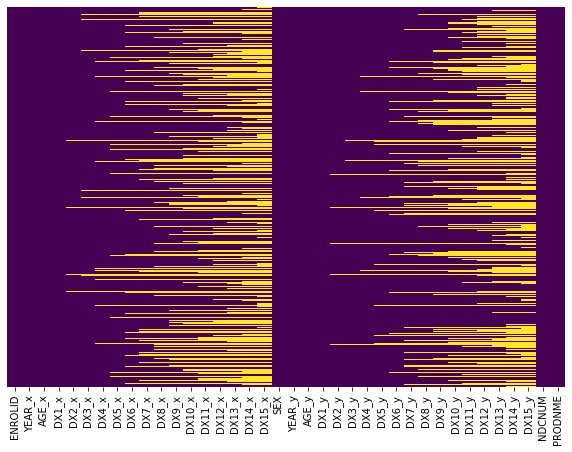

In [31]:
plt.figure(figsize = (10, 7))
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap='viridis')

### Fill Null Value with '999'

In [32]:
df = df.fillna('999')

### Visualize the null value again

<AxesSubplot:>

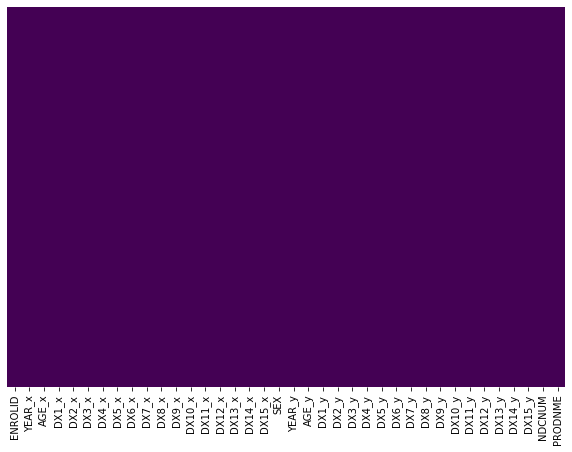

In [33]:
plt.figure(figsize = (10, 7))
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap='viridis')

## Plots

### Countplot of diagnosis codes relates to heart disease in 2019

In [34]:
dx = df.loc[df['DX1_x'].str.startswith('I')]
dx['DX1_x'].value_counts()

I130      248
I214      237
I110      208
I161       96
I132       95
         ... 
I455        1
I82621      1
I742        1
I169        1
I6359       1
Name: DX1_x, Length: 156, dtype: int64

#### DX1 Heart Disease Diagnosis

Text(0.5, 1.0, 'Diagnosis 1 relates to Circulatory System in 2019')

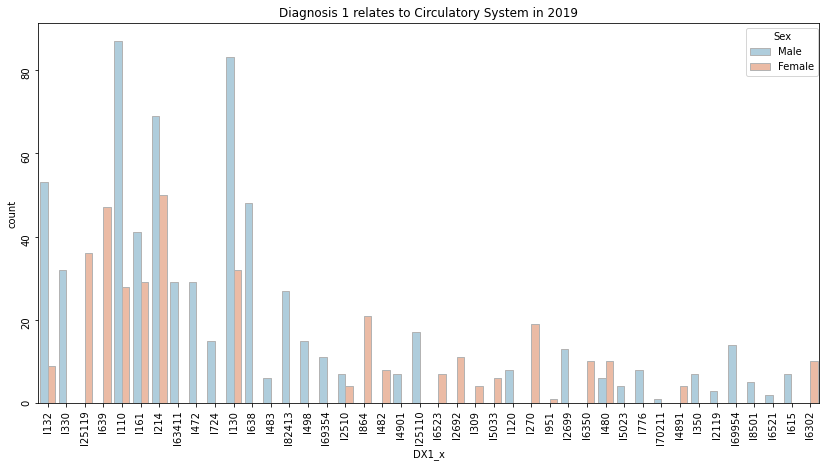

In [44]:
plt.figure(figsize=(14, 7))
ax = sns.countplot(x=dx['DX1_x'][:1000], hue='SEX', edgecolor=".7", palette='RdBu_r', data=df)
plt.tick_params(labelrotation=90)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Male', 'Female'],
          bbox_to_anchor=(0.9,1),
         title = 'Sex')
plt.title("Diagnosis relates to Circulatory System in 2019")
#plt.legend(loc='upper right')

#### DX2 Heart Disease Diagnosis

Text(0.5, 1.0, 'Diagnosis relates to Circulatory System in 2019')

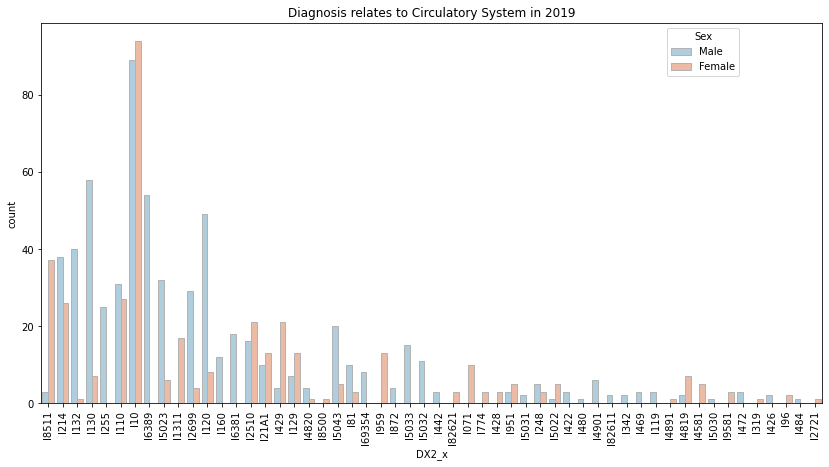

In [58]:
# DX2
dx = df.loc[df['DX2_x'].str.startswith('I')]
plt.figure(figsize=(14, 7))
ax = sns.countplot(x=dx['DX2_x'][:1000], hue='SEX', edgecolor=".7", palette='RdBu_r', data=df)
plt.xticks(rotation=90)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Male', 'Female'],
          bbox_to_anchor=(0.9,1.0),
         title = 'Sex')
plt.title("Diagnosis relates to Circulatory System in 2019")
#plt.legend(loc='upper right', title='SEX')

### All Kind of Disease Diagnosis Code in 2019

In [146]:
col = [x for x in df.columns if x.startswith('DX')]

In [161]:
col[:5]

['DX1_x', 'DX2_x', 'DX3_x', 'DX4_x', 'DX5_x']

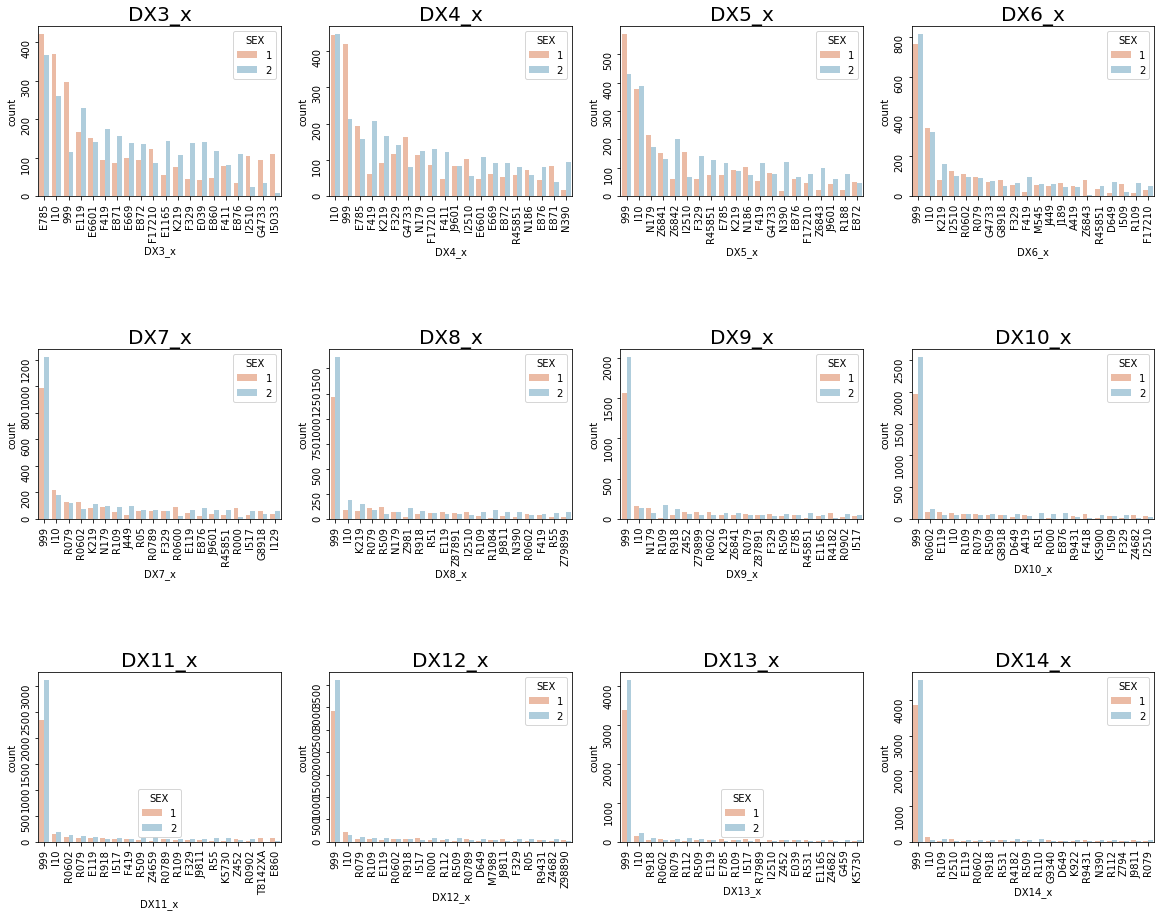

In [162]:
# plot all the diagnosis code 
fig, ax = plt.subplots(3, 4, figsize=(20, 15))
ax = ax.ravel()
position = 0

for i in col[2:14]:
    order = df[i].value_counts().iloc[:20].index
    sns.countplot(x=i, ax=ax[position], hue='SEX', palette='RdBu', order=order, data=df)
    ax[position].tick_params(labelrotation=90)

    ax[position].set_title(i, fontdict={'fontsize': 20})
    position += 1
    
plt.subplots_adjust(hspace=0.9)
plt.show()

### Countplot of diagnosis codes relates to heart disease in 2020

In [60]:
dx1 = df.loc[df['DX1_y'].str.startswith('I')]
dx1['DX1_y'].value_counts()

I110     215
I214     169
I130     142
I639     130
I480      95
        ... 
I739       1
I421       1
I5023      1
I7772      1
I7101      1
Name: DX1_y, Length: 144, dtype: int64

#### DX1 Heart Disease Diagnosis in 2020

Text(0.5, 1.0, 'Diagnosis relates to Circulatory System in 2020')

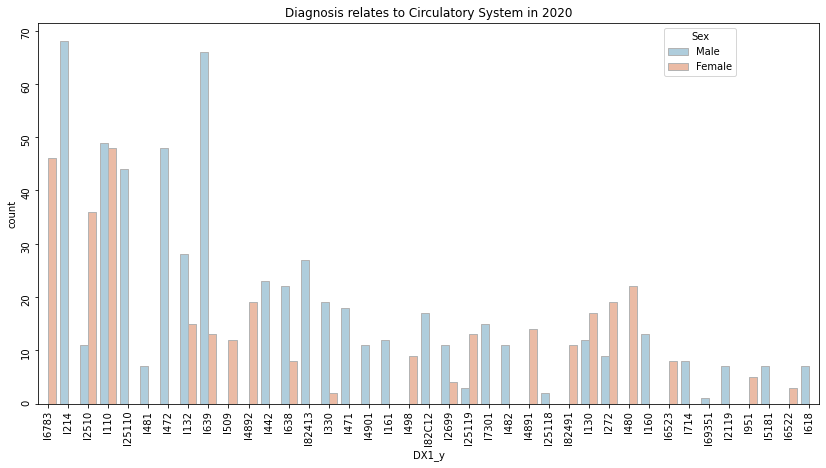

In [61]:
# DX1 
plt.figure(figsize=(14, 7))

ax = sns.countplot(x=dx1['DX1_y'][:900], hue='SEX', edgecolor=".7", palette='RdBu_r', data=df)
plt.tick_params(labelrotation=90)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Male', 'Female'],
          bbox_to_anchor=(0.9,1),
         title = 'Sex')
plt.title("Diagnosis relates to Circulatory System in 2020")
#plt.title("Diagnosis 1 relates to Heart Disease in 2020")
#plt.legend(loc='upper right', title='SEX')

#### DX2 Heart Disease Diagnosis in 2020

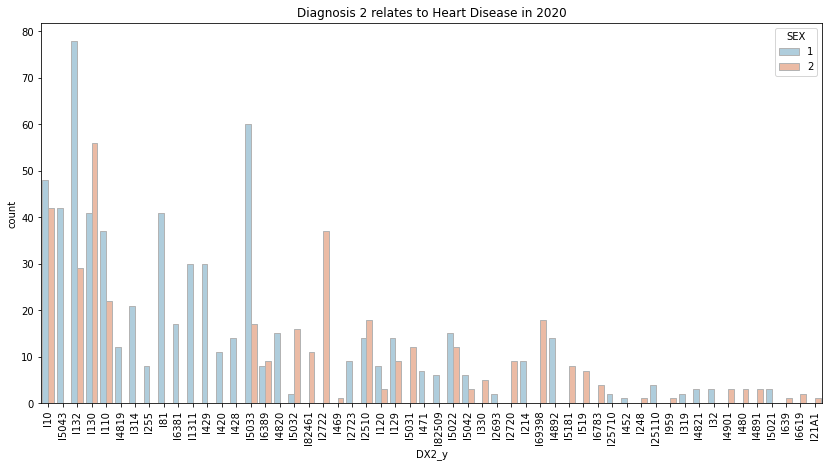

In [27]:
# DX2
dx1 = df.loc[df['DX2_y'].str.startswith('I')]
plt.figure(figsize=(14, 7))
sns.countplot(x=dx1['DX2_y'][:1000], hue='SEX', edgecolor=".7", palette='RdBu_r', data=df)
plt.xticks(rotation=90)
plt.title("Diagnosis 2 relates to Heart Disease in 2020")
plt.legend(loc='upper right', title='SEX')

#### DX3 Heart Disease Disgnosis in 2020

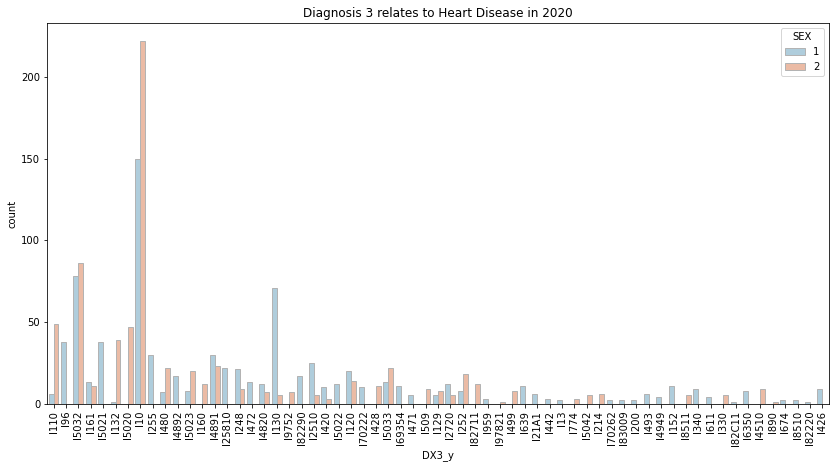

In [166]:
# DX3
dx = df.loc[df['DX3_y'].str.startswith('I')]
plt.figure(figsize=(14, 7))
sns.countplot(x=dx['DX3_y'][:1500], hue='SEX', edgecolor=".7", palette='RdBu_r', data=df)
plt.xticks(rotation=90)
plt.title("Diagnosis 3 relates to Heart Disease in 2020")
plt.legend(loc='upper right', title='SEX')

### All Kind of Disease Code in 2020

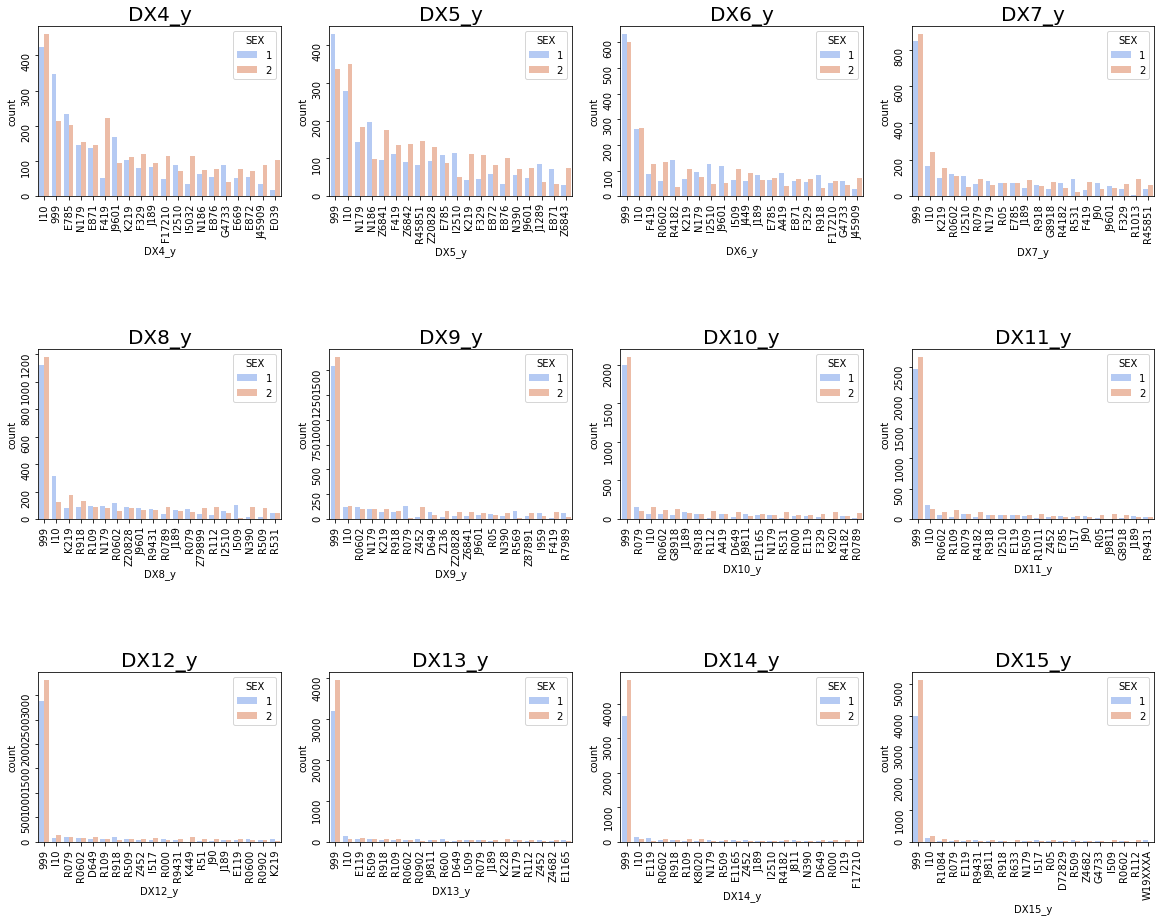

In [171]:
fig, ax = plt.subplots(3, 4, figsize=(20, 15))
ax = ax.ravel()
position = 0

for i in col[18:]:
    order = df[i].value_counts().iloc[:20].index
    sns.countplot(x=i, ax=ax[position], hue='SEX', palette='coolwarm', order=order, data=df)
    ax[position].tick_params(labelrotation=90)

    ax[position].set_title(i, fontdict={'fontsize': 20})
    position += 1
    
plt.subplots_adjust(hspace=0.9)
plt.show()

### Top 20 Most Used Drugs

Text(0.5, 1.0, 'Top 20 Most Used Drugs')

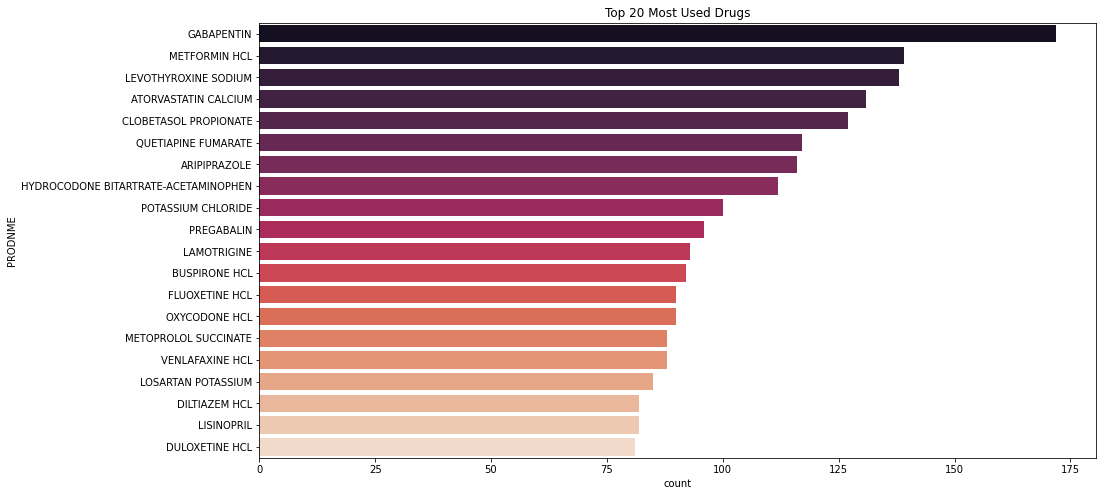

In [172]:
plt.figure(figsize=(15, 8))
sns.countplot(y=df['PRODNME'], order=df.PRODNME.value_counts().iloc[:20].index, 
              palette = 'rocket', data=df)
plt.title('Top 20 Most Used Drugs')

### Top 20 Most Doctor Visited Patients

Text(0.5, 1.0, 'Top 20 Most Doctor Visited Patients')

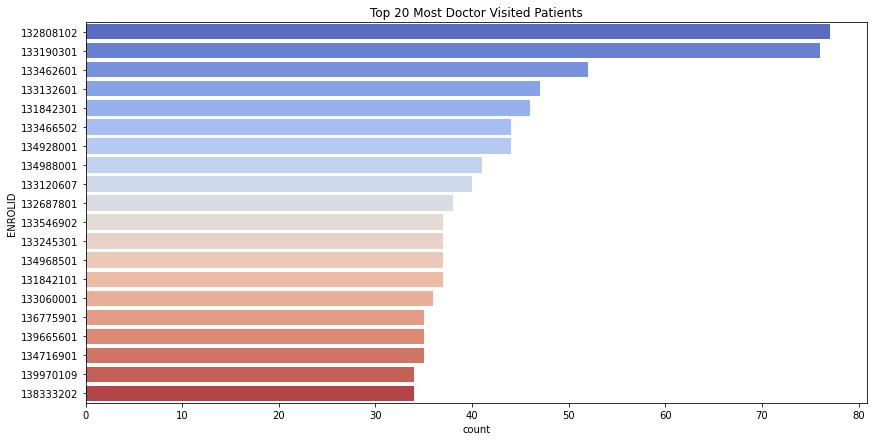

In [180]:
plt.figure(figsize=(14, 7))
sns.countplot(y=df['ENROLID'], order=df.ENROLID.value_counts().iloc[:20].index, 
              palette = 'coolwarm', data=df)
plt.title('Top 20 Most Doctor Visited Patients')

### Age Distribution in 2019 and 2020

Text(0.5, 1.0, 'Age Distribution in 2019 and 2020')

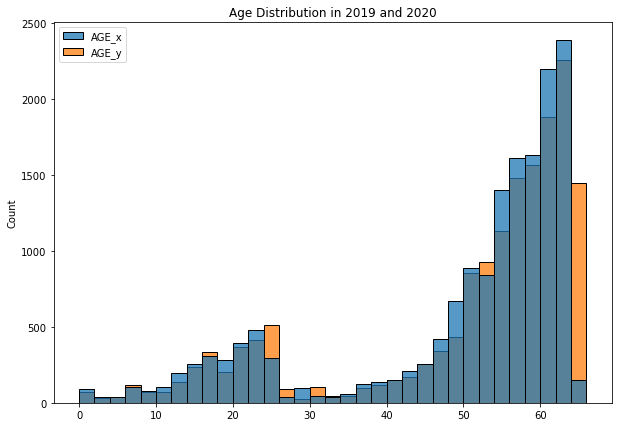

In [182]:
# Age_x is in 2019, Age_y is in 2020
plt.figure(figsize=(10, 7))
ax = sns.histplot(df[['AGE_x', 'AGE_y']],binwidth=2)
ax.set_title('Age Distribution in 2019 and 2020')

### Density of Age Vs. SEX 

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


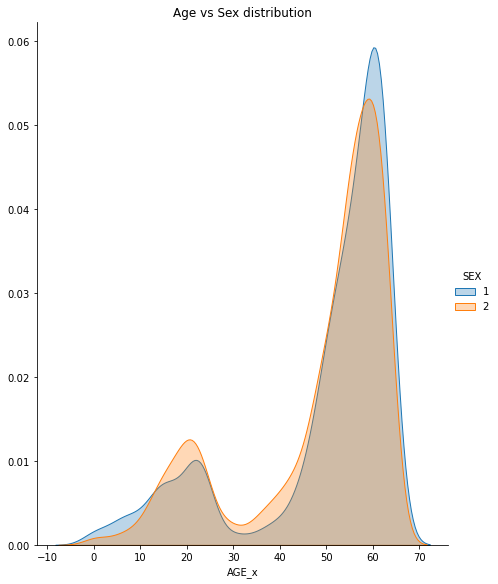

In [207]:
g = sns.FacetGrid(df, hue='SEX', size = 8, height = 4, aspect=0.8)
g = g.map(sns.kdeplot, 'AGE_x', shade=True, alpha=0.3)
plt.title('Age vs Sex distribution')
g.add_legend()

## Data Cleansing

### Make Vectors

In [267]:
### hard coded, S couldn't figure out a smarter way
# df['Q_1'] = df['DX1_y'].apply(lambda x: 1 if x.startswith('Q') else 0)
# df['Q_2'] = df['DX2_y'].apply(lambda x: 1 if x.startswith('Q') else 0)
# df['Q_3'] = df['DX3_y'].apply(lambda x: 1 if x.startswith('Q') else 0)
# df['Q_4'] = df['DX4_y'].apply(lambda x: 1 if x.startswith('Q') else 0)
# df['Q_5'] = df['DX5_y'].apply(lambda x: 1 if x.startswith('Q') else 0)
# df['Q_6'] = df['DX6_y'].apply(lambda x: 1 if x.startswith('Q') else 0)
# df['Q_7'] = df['DX7_y'].apply(lambda x: 1 if x.startswith('Q') else 0)
# df['Q_8'] = df['DX8_y'].apply(lambda x: 1 if x.startswith('Q') else 0)
# df['Q_9'] = df['DX9_y'].apply(lambda x: 1 if x.startswith('Q') else 0)
# df['Q_10'] = df['DX10_y'].apply(lambda x: 1 if x.startswith('Q') else 0)
# df['Q_11'] = df['DX11_y'].apply(lambda x: 1 if x.startswith('Q') else 0)
# df['Q_12'] = df['DX12_y'].apply(lambda x: 1 if x.startswith('Q') else 0)
# df['Q_13'] = df['DX13_y'].apply(lambda x: 1 if x.startswith('Q') else 0)
# df['Q_14'] = df['DX14_y'].apply(lambda x: 1 if x.startswith('Q') else 0)
# df['Q_15'] = df['DX15_y'].apply(lambda x: 1 if x.startswith('Q') else 0)
# df['R_1'] = df['DX1_y'].apply(lambda x: 1 if x.startswith('R') else 0)
# df['R_2'] = df['DX2_y'].apply(lambda x: 1 if x.startswith('R') else 0)
# df['R_3'] = df['DX3_y'].apply(lambda x: 1 if x.startswith('R') else 0)
# df['R_4'] = df['DX4_y'].apply(lambda x: 1 if x.startswith('R') else 0)
# df['R_5'] = df['DX5_y'].apply(lambda x: 1 if x.startswith('R') else 0)
# df['R_6'] = df['DX6_y'].apply(lambda x: 1 if x.startswith('R') else 0)
# df['R_7'] = df['DX7_y'].apply(lambda x: 1 if x.startswith('R') else 0)
# df['R_8'] = df['DX8_y'].apply(lambda x: 1 if x.startswith('R') else 0)
# df['R_9'] = df['DX9_y'].apply(lambda x: 1 if x.startswith('R') else 0)
# df['R_10'] = df['DX10_y'].apply(lambda x: 1 if x.startswith('R') else 0)
# df['R_11'] = df['DX11_y'].apply(lambda x: 1 if x.startswith('R') else 0)
# df['R_12'] = df['DX12_y'].apply(lambda x: 1 if x.startswith('R') else 0)
# df['R_13'] = df['DX13_y'].apply(lambda x: 1 if x.startswith('R') else 0)
# df['R_14'] = df['DX14_y'].apply(lambda x: 1 if x.startswith('R') else 0)
# df['R_15'] = df['DX15_y'].apply(lambda x: 1 if x.startswith('R') else 0)
# df['S_1'] = df['DX1_y'].apply(lambda x: 1 if x.startswith('S') else 0)
# df['S_2'] = df['DX2_y'].apply(lambda x: 1 if x.startswith('S') else 0)
# df['S_3'] = df['DX3_y'].apply(lambda x: 1 if x.startswith('S') else 0)
# df['S_4'] = df['DX4_y'].apply(lambda x: 1 if x.startswith('S') else 0)
# df['S_5'] = df['DX5_y'].apply(lambda x: 1 if x.startswith('S') else 0)
# df['S_6'] = df['DX6_y'].apply(lambda x: 1 if x.startswith('S') else 0)
# df['S_7'] = df['DX7_y'].apply(lambda x: 1 if x.startswith('S') else 0)
# df['S_8'] = df['DX8_y'].apply(lambda x: 1 if x.startswith('S') else 0)
# df['S_9'] = df['DX9_y'].apply(lambda x: 1 if x.startswith('S') else 0)
# df['S_10'] = df['DX10_y'].apply(lambda x: 1 if x.startswith('S') else 0)
# df['S_11'] = df['DX11_y'].apply(lambda x: 1 if x.startswith('S') else 0)
# df['S_12'] = df['DX12_y'].apply(lambda x: 1 if x.startswith('S') else 0)
# df['S_13'] = df['DX13_y'].apply(lambda x: 1 if x.startswith('S') else 0)
# df['S_14'] = df['DX14_y'].apply(lambda x: 1 if x.startswith('S') else 0)
# df['S_15'] = df['DX15_y'].apply(lambda x: 1 if x.startswith('S') else 0)
# df['D_1'] = df['DX1_y'].apply(lambda x: 1 if x.startswith('D') else 0)
# df['D_2'] = df['DX2_y'].apply(lambda x: 1 if x.startswith('D') else 0)
# df['D_3'] = df['DX3_y'].apply(lambda x: 1 if x.startswith('D') else 0)
# df['D_4'] = df['DX4_y'].apply(lambda x: 1 if x.startswith('D') else 0)
# df['D_5'] = df['DX5_y'].apply(lambda x: 1 if x.startswith('D') else 0)
# df['D_6'] = df['DX6_y'].apply(lambda x: 1 if x.startswith('D') else 0)
# df['D_7'] = df['DX7_y'].apply(lambda x: 1 if x.startswith('D') else 0)
# df['D_8'] = df['DX8_y'].apply(lambda x: 1 if x.startswith('D') else 0)
# df['D_9'] = df['DX9_y'].apply(lambda x: 1 if x.startswith('D') else 0)
# df['D_10'] = df['DX10_y'].apply(lambda x: 1 if x.startswith('D') else 0)
# df['D_11'] = df['DX11_y'].apply(lambda x: 1 if x.startswith('D') else 0)
# df['D_12'] = df['DX12_y'].apply(lambda x: 1 if x.startswith('D') else 0)
# df['D_13'] = df['DX13_y'].apply(lambda x: 1 if x.startswith('D') else 0)
# df['D_14'] = df['DX14_y'].apply(lambda x: 1 if x.startswith('D') else 0)
# df['D_15'] = df['DX15_y'].apply(lambda x: 1 if x.startswith('D') else 0)
# df['X_1'] = df['DX1_y'].apply(lambda x: 1 if x.startswith('X') else 0)
# df['X_2'] = df['DX2_y'].apply(lambda x: 1 if x.startswith('X') else 0)
# df['X_3'] = df['DX3_y'].apply(lambda x: 1 if x.startswith('X') else 0)
# df['X_4'] = df['DX4_y'].apply(lambda x: 1 if x.startswith('X') else 0)
# df['X_5'] = df['DX5_y'].apply(lambda x: 1 if x.startswith('X') else 0)
# df['X_6'] = df['DX6_y'].apply(lambda x: 1 if x.startswith('X') else 0)
# df['X_7'] = df['DX7_y'].apply(lambda x: 1 if x.startswith('X') else 0)
# df['X_8'] = df['DX8_y'].apply(lambda x: 1 if x.startswith('X') else 0)
# df['X_9'] = df['DX9_y'].apply(lambda x: 1 if x.startswith('X') else 0)
# df['X_10'] = df['DX10_y'].apply(lambda x: 1 if x.startswith('X') else 0)
# df['X_11'] = df['DX11_y'].apply(lambda x: 1 if x.startswith('X') else 0)
# df['X_12'] = df['DX12_y'].apply(lambda x: 1 if x.startswith('X') else 0)
# df['X_13'] = df['DX13_y'].apply(lambda x: 1 if x.startswith('X') else 0)
# df['X_14'] = df['DX14_y'].apply(lambda x: 1 if x.startswith('X') else 0)
# df['X_15'] = df['DX15_y'].apply(lambda x: 1 if x.startswith('X') else 0)
# df['T_1'] = df['DX1_y'].apply(lambda x: 1 if x.startswith('T') else 0)
# df['T_2'] = df['DX2_y'].apply(lambda x: 1 if x.startswith('T') else 0)
# df['T_3'] = df['DX3_y'].apply(lambda x: 1 if x.startswith('T') else 0)
# df['T_4'] = df['DX4_y'].apply(lambda x: 1 if x.startswith('T') else 0)
# df['T_5'] = df['DX5_y'].apply(lambda x: 1 if x.startswith('T') else 0)
# df['T_6'] = df['DX6_y'].apply(lambda x: 1 if x.startswith('T') else 0)
# df['T_7'] = df['DX7_y'].apply(lambda x: 1 if x.startswith('T') else 0)
# df['T_8'] = df['DX8_y'].apply(lambda x: 1 if x.startswith('T') else 0)
# df['T_9'] = df['DX9_y'].apply(lambda x: 1 if x.startswith('T') else 0)
# df['T_10'] = df['DX10_y'].apply(lambda x: 1 if x.startswith('T') else 0)
# df['T_11'] = df['DX11_y'].apply(lambda x: 1 if x.startswith('T') else 0)
# df['T_12'] = df['DX12_y'].apply(lambda x: 1 if x.startswith('T') else 0)
# df['T_13'] = df['DX13_y'].apply(lambda x: 1 if x.startswith('T') else 0)
# df['T_14'] = df['DX14_y'].apply(lambda x: 1 if x.startswith('T') else 0)
# df['T_15'] = df['DX15_y'].apply(lambda x: 1 if x.startswith('T') else 0)
# df['U_1'] = df['DX1_y'].apply(lambda x: 1 if x.startswith('U') else 0)
# df['U_2'] = df['DX2_y'].apply(lambda x: 1 if x.startswith('U') else 0)
# df['U_3'] = df['DX3_y'].apply(lambda x: 1 if x.startswith('U') else 0)
# df['U_4'] = df['DX4_y'].apply(lambda x: 1 if x.startswith('U') else 0)
# df['U_5'] = df['DX5_y'].apply(lambda x: 1 if x.startswith('U') else 0)
# df['U_6'] = df['DX6_y'].apply(lambda x: 1 if x.startswith('U') else 0)
# df['U_7'] = df['DX7_y'].apply(lambda x: 1 if x.startswith('U') else 0)
# df['U_8'] = df['DX8_y'].apply(lambda x: 1 if x.startswith('U') else 0)
# df['U_9'] = df['DX9_y'].apply(lambda x: 1 if x.startswith('U') else 0)
# df['U_10'] = df['DX10_y'].apply(lambda x: 1 if x.startswith('U') else 0)
# df['U_11'] = df['DX11_y'].apply(lambda x: 1 if x.startswith('U') else 0)
# df['U_12'] = df['DX12_y'].apply(lambda x: 1 if x.startswith('U') else 0)
# df['U_13'] = df['DX13_y'].apply(lambda x: 1 if x.startswith('U') else 0)
# df['U_14'] = df['DX14_y'].apply(lambda x: 1 if x.startswith('U') else 0)
# df['U_15'] = df['DX15_y'].apply(lambda x: 1 if x.startswith('U') else 0)

In [262]:
df.head()

,ENROLID,YEAR_x,AGE_x,DX1_x,DX2_x,DX3_x,DX4_x,DX5_x,DX6_x,DX7_x,DX8_x,DX9_x,DX10_x,DX11_x,DX12_x,DX13_x,DX14_x,DX15_x,SEX,YEAR_y,AGE_y,DX1_y,DX2_y,DX3_y,DX4_y,DX5_y,DX6_y,DX7_y,DX8_y,DX9_y,DX10_y,DX11_y,DX12_y,DX13_y,DX14_y,DX15_y,NDCNUM,PRODNME,H,I,J,K,L,G,F,A,B,C,D,E,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,U_1,U_2,U_3,U_4,U_5,U_6,U_7,U_8,U_9,U_10,U_11,U_12,U_13,U_14,U_15,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14,V_15,W_1,W_2,W_3,W_4,W_5,W_6,W_7,W_8,W_9,W_10,W_11,W_12,W_13,W_14,W_15,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7,Y_8,Y_9,Y_10,Y_11,Y_12,Y_13,Y_14,Y_15,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7,Z_8,Z_9,Z_10,Z_11,Z_12,Z_13,Z_14,Z_15,U1,V1,W1,X1,Y1,Z1,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14,A_15,B_1,B_2,B_3,B_4,B_5,B_6,B_7,B_8,B_9,B_10,B_11,B_12,B_13,B_14,B_15,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,C_11,C_12,C_13,C_14,C_15,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,D_9,D_10,D_11,D_12,D_13,D_14,D_15,E_1,E_2,E_3,E_4,E_5,E_6,E_7,E_8,E_9,E_10,E_11,E_12,E_13,E_14,E_15,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,A1,B1,C1,D1,E1,F1,G_1,G_2,G_3,G_4,G_5,G_6,G_7,G_8,G_9,G_10,G_11,G_12,G_13,G_14,G_15,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10,H_11,H_12,H_13,H_14,H_15,I_1,I_2,I_3,I_4,I_5,I_6,I_7,I_8,I_9,I_10,I_11,I_12,I_13,I_14,I_15,J_1,J_2,J_3,J_4,J_5,J_6,J_7,J_8,J_9,J_10,J_11,J_12,J_13,J_14,J_15,K_1,K_2,K_3,K_4,K_5,K_6,K_7,K_8,K_9,K_10,K_11,K_12,K_13,K_14,K_15,G1,H1,I1,J1,K1
0,131842101,2019,54,K7469,I8511,K2951,K766,R188,M79605,R05,R1900,I8500,E876,R0602,Z9049,F17210,K922,I10,2,2020,55,M19212,E119,E6601,K7460,Z6841,M19012,G8918,G35,999,999,999,999,999,999,999,93310905,AMOXICILLIN,0,3,0,4,0,0,1,0,0,0,0,1,1,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1
1,131842101,2019,54,K7469,I8511,K2951,K766,R188,M79605,R05,R1900,I8500,E876,R0602,Z9049,F17210,K922,I10,2,2020,55,M19212,E119,E6601,K7460,Z6841,M19012,G8918,G35,999,999,999,999,999,999,999,93312501,DICLOXACILLIN SODIUM,0,3,0,4,0,0,1,0,0,0,0,1,1,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1
2,131842101,2019,54,K7469,I8511,K2951,K766,R188,M79605,R05,R1900,I8500,E876,R0602,Z9049,F17210,K922,I10,2,2020,55,M19212,E119,E6601,K7460,Z6841,M19012,G8918,G35,999,999,999,999,999,999,999,121057716,LACTULOSE,0,3,0,4,0,0,1,0,0,0,0,1,1,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1
3,131842101,2019,54,K7469,I8511,K2951,K766,R188,M79605,R05,R1900,I8500,E876,R0602,Z9049,F17210,K922,I10

In [268]:
# df['Q1'] = (df['Q_1'] + df['Q_2'] + df['Q_3'] + df['Q_4'] + df['Q_5'] +
#                  df['Q_6'] + df['Q_7'] + df['Q_8'] + df['Q_9'] + df['Q_10'] + 
#                  df['Q_11'] + df['Q_12'] + df['Q_13'] + df['Q_14'] + df['Q_15'])

# df['R1'] = (df['R_1'] + df['R_2'] + df['R_3'] + df['R_4'] + df['R_5'] +
#                  df['R_6'] + df['R_7'] + df['R_8'] + df['R_9'] + df['R_10'] + 
#                  df['R_11'] + df['R_12'] + df['R_13'] + df['R_14'] + df['R_15'])


# df['S1'] = (df['S_1'] + df['S_2'] + df['S_3'] + df['S_4'] + df['S_5'] +
#                  df['S_6'] + df['S_7'] + df['S_8'] + df['S_9'] + df['S_10'] + 
#                  df['S_11'] + df['S_12'] + df['S_13'] + df['S_14'] + df['S_15'])
# df['T1'] = (df['T_1'] + df['T_2'] + df['T_3'] + df['T_4'] + df['T_5'] +
#                  df['T_6'] + df['T_7'] + df['T_8'] + df['T_9'] + df['T_10'] + 
#                  df['T_11'] + df['T_12'] + df['T_13'] + df['T_14'] + df['T_15'])
# df['U1'] = (df['U_1'] + df['U_2'] + df['U_3'] + df['U_4'] + df['U_5'] +
#                  df['U_6'] + df['U_7'] + df['U_8'] + df['U_9'] + df['U_10'] + 
#                  df['U_11'] + df['U_12'] + df['U_13'] + df['U_14'] + df['U_15'])
# df['F1'] = (df['F_1'] + df['F_2'] + df['F_3'] + df['F_4'] + df['F_5'] +
#                  df['F_6'] + df['F_7'] + df['F_8'] + df['F_9'] + df['F_10'] + 
#                  df['F_11'] + df['F_12'] + df['F_13'] + df['F_14'] + df['F_15'])
# df['S'] = (df['S_1'] + df['S_2'] + df['S_3'] + df['S_4'] + df['S_5'] +
#                  df['S_6'] + df['S_7'] + df['S_8'] + df['S_9'] + df['S_10'] + 
#                  df['S_11'] + df['S_12'] + df['S_13'] + df['S_14'] + df['S_15'])
# df['F1'] = (df['F_1'] + df['F_2'] + df['F_3'] + df['F_4'] + df['F_5'] +
#                  df['F_6'] + df['F_7'] + df['F_8'] + df['F_9'] + df['F_10'] + 
#                  df['F_11'] + df['F_12'] + df['F_13'] + df['F_14'] + df['F_15'])

In [294]:
# # only can drop 3 columns at a time, otherwise will crash the program
# cols = [x for x in df.columns if x.startswith('Z_')]
# df.drop(cols, axis=1, inplace=True)

In [296]:
## Save as cleaned dataset

# df.to_csv('faa_data.csv')

### Drop All the DX Code

In [373]:
cols = [x for x in df.columns if x.startswith('DX')]
# cols

In [298]:
# df.drop(cols, axis=1, inplace=True)

In [299]:
df.head()

,ENROLID,YEAR_x,AGE_x,SEX,YEAR_y,AGE_y,NDCNUM,PRODNME,H,I,J,K,L,G,F,A,B,C,D,E,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,U1,V1,W1,X1,Y1,Z1,A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,K1,L1,M1,N1,O1,P1,Q1,R1,S1,T1
0,131842101,2019,54,2,2020,55,93310905,AMOXICILLIN,0,3,0,4,0,0,1,0,0,0,0,1,1,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,2,0,0,0,1,0,2,0,0,0,0,0,0,0
1,131842101,2019,54,2,2020,55,93312501,DICLOXACILLIN SODIUM,0,3,0,4,0,0,1,0,0,0,0,1,1,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,2,0,0,0,1,0,2,0,0,0,0,0,0,0
2,131842101,2019,54,2,2020,55,121057716,LACTULOSE,0,3,0,4,0,0,1,0,0,0,0,1,1,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,2,0,0,0,1,0,2,0,0,0,0,0,0,0
3,131842101,2019,54,2,2020,55,378020810,FUROSEMIDE,0,3,0,4,0,0,1,0,0,0,0,1,1,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,2,0,0,0,1,0,2,0,0,0,0,0,0,0
4,131842101,2019,54,2,2020,55,378021610,FUROSEMIDE,0,3,0,4,0,0,1,0,0,0,0,1,1,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,2,0,0,0,1,0,2,0,0,0,0,0,0,0


### Drop all the duplicates ENROLID

In [300]:
df.drop_duplicates(subset = ['ENROLID'], keep='first', inplace=True)

In [305]:
df.head(10)

,ENROLID,YEAR_x,AGE_x,SEX,YEAR_y,AGE_y,NDCNUM,PRODNME,H,I,J,K,L,G,F,A,B,C,D,E,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,U1,V1,W1,X1,Y1,Z1,A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,K1,L1,M1,N1,O1,P1,Q1,R1,S1,T1
0,131842101,2019,54,2,2020,55,93310905,AMOXICILLIN,0,3,0,4,0,0,1,0,0,0,0,1,1,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,2,0,0,0,1,0,2,0,0,0,0,0,0,0
111,131842201,2019,50,1,2020,51,93005301,BUSPIRONE HCL,0,0,1,5,0,0,0,2,0,0,1,2,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,2,3,1,0,0,1,0,1,0,0,0,0,0,0,2,0,0
145,131842301,2019,54,2,2020,55,169266015,TRESIBA FLEXTOUCH PEN,0,2,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,7,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,2,0,5,1,0,0,0,0,0,0,0,5,0,0
239,131856402,2019,62,1,2020,63,78077720,ENTRESTO,0,4,1,0,0,0,0,0,0,0,0,3,0,3,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,2,0,0,0,2,2,0,0,0,2,0,0,0,3,0,0
262,131866508,2019,13,2,2020,14,193288050,KETOSTIX,0,0,0,1,0,0,0,0,0,0,0,5,0,0,0,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
267,131908601,2019,51,2,2020,52,93005805,TRAMADOL HCL,0,0,2,3,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,3,5,0,0,0,0,0,0,3,0,0
407,131932301,2019,54,1,2020,55,228300450,CLONAZEPAM,0,1,0,0,0,0,4,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,1,0,2,0,0,0,0,2,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,3,7,0
417,131946001,2019,51,2,2020,52,93172110,WARFARIN SODIUM,0,2,0,2,2,1,0,0,0,0,0,0,5,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,1,0,3,3,0,0,0,0,1,0,0
475,131951103,2019,19,2,2020,20,93221005,SUCRALFATE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0
487,132687801,2019,61,1,2020,62,143924920,AMOXICILLIN/CLAVULANATE POTASSIUM,0,6,2,0,2,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,3,0,0,3,1,0,0,0,0,2,0,1


In [302]:
df.shape

(5016, 60)

### Drop all Categorical column

In [306]:
df.drop(columns = 'PRODNME',inplace=True)

In [307]:
df.head()

,ENROLID,YEAR_x,AGE_x,SEX,YEAR_y,AGE_y,NDCNUM,H,I,J,K,L,G,F,A,B,C,D,E,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,U1,V1,W1,X1,Y1,Z1,A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,K1,L1,M1,N1,O1,P1,Q1,R1,S1,T1
0,131842101,2019,54,2,2020,55,93310905,0,3,0,4,0,0,1,0,0,0,0,1,1,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,2,0,0,0,1,0,2,0,0,0,0,0,0,0
111,131842201,2019,50,1,2020,51,93005301,0,0,1,5,0,0,0,2,0,0,1,2,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,2,3,1,0,0,1,0,1,0,0,0,0,0,0,2,0,0
145,131842301,2019,54,2,2020,55,169266015,0,2,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,7,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,2,0,5,1,0,0,0,0,0,0,0,5,0,0
239,131856402,2019,62,1,2020,63,78077720,0,4,1,0,0,0,0,0,0,0,0,3,0,3,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,2,0,0,0,2,2,0,0,0,2,0,0,0,3,0,0
262,131866508,2019,13,2,2020,14,193288050,0,0,0,1,0,0,0,0,0,0,0,5,0,0,0,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


## Save as Cleaned Numerical Dataset

In [308]:
# df.to_csv('faa_cleaned_data.csv')

In [339]:
df = pd.read_csv('faa_cleaned_data.csv', index_col = 0)
df.head()

,ENROLID,YEAR_x,AGE_x,SEX,YEAR_y,AGE_y,NDCNUM,H,I,J,K,L,G,F,A,B,C,D,E,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,U1,V1,W1,X1,Y1,Z1,A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,K1,L1,M1,N1,O1,P1,Q1,R1,S1,T1
0,131842101,2019,54,2,2020,55,93310905,0,3,0,4,0,0,1,0,0,0,0,1,1,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,2,0,0,0,1,0,2,0,0,0,0,0,0,0
111,131842201,2019,50,1,2020,51,93005301,0,0,1,5,0,0,0,2,0,0,1,2,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,2,3,1,0,0,1,0,1,0,0,0,0,0,0,2,0,0
145,131842301,2019,54,2,2020,55,169266015,0,2,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,7,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,2,0,5,1,0,0,0,0,0,0,0,5,0,0
239,131856402,2019,62,1,2020,63,78077720,0,4,1,0,0,0,0,0,0,0,0,3,0,3,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,2,0,0,0,2,2,0,0,0,2,0,0,0,3,0,0
262,131866508,2019,13,2,2020,14,193288050,0,0,0,1,0,0,0,0,0,0,0,5,0,0,0,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


### Change I to Response Variable

#### Total I distribution in 2019

<AxesSubplot:xlabel='I', ylabel='Probability'>

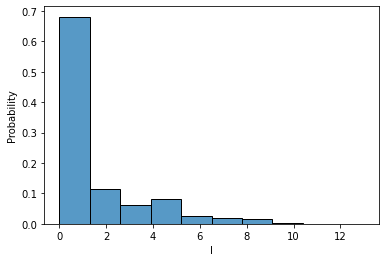

In [340]:
sns.histplot(x = 'I',bins=10,stat = 'probability', data = df)

In [341]:
df['I'] = df['I'].apply(lambda x: 1 if x > 0  else 0)

In [342]:
df.head()

,ENROLID,YEAR_x,AGE_x,SEX,YEAR_y,AGE_y,NDCNUM,H,I,J,K,L,G,F,A,B,C,D,E,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,U1,V1,W1,X1,Y1,Z1,A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,K1,L1,M1,N1,O1,P1,Q1,R1,S1,T1
0,131842101,2019,54,2,2020,55,93310905,0,1,0,4,0,0,1,0,0,0,0,1,1,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,2,0,0,0,1,0,2,0,0,0,0,0,0,0
111,131842201,2019,50,1,2020,51,93005301,0,0,1,5,0,0,0,2,0,0,1,2,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,2,3,1,0,0,1,0,1,0,0,0,0,0,0,2,0,0
145,131842301,2019,54,2,2020,55,169266015,0,1,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,7,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,2,0,5,1,0,0,0,0,0,0,0,5,0,0
239,131856402,2019,62,1,2020,63,78077720,0,1,1,0,0,0,0,0,0,0,0,3,0,3,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,2,0,0,0,2,2,0,0,0,2,0,0,0,3,0,0
262,131866508,2019,13,2,2020,14,193288050,0,0,0,1,0,0,0,0,0,0,0,5,0,0,0,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [343]:
df['I'].value_counts()

1    2950
0    2066
Name: I, dtype: int64

## Change Code Letter to Disease Name

In [345]:
df['Infectious And Parastic Disease(A & B)'] = df['A'] + df['B'] + df['A1'] + df['B1']
df['Neoplasms(C)'] = df['C'] + df['C1']
df['Neoplasms Blood-forming Organs(D)'] = df['D'] + df['D1']
df['Endocrine Nutritional Metabolic(E)'] = df['E'] + df['E1']
df['Mental Behavioral Disorders(F)'] = df['F'] + df['F1']
df['Nervous System(G)'] = df['G'] + df['G1']
df['Eye Adnexa, Ear and Mastoid(H)'] = df['H'] + df['H1']
df['Circulatory System(I)'] = df['I1']
df['Respiratory System(J)'] = df['J'] + df['J1']
df['Digestive System(K)'] = df['K'] + df['K1']
df['Skin and Connective Tissue(L)'] = df['L'] + df['L1']
df['musculoskeletal and Connective Tissue(M)'] = df['M'] + df['M1']
df['Genitourinary System(N)'] = df['N'] + df['N1']
df['Pregancy, Childbirth(O)'] = df['O'] + df['O1']
df['Conditions Originating in the Perinatal Period(P)'] = df['P'] + df['P1']
df['Congenital Malformations, Deformations(Q)'] = df['Q'] + df['Q1']
df['Symptoms, Signs, Lab Findings(R)'] = df['R'] + df['R1']
df['Injury, Poisoning(S, T)'] = df['S'] + df['T'] + df['S1'] + df['T1']
df['Emergency code additions(U)'] = df['U'] + df['U1']
df['External Causes of Morbidity(V, W, X, Y)'] = (df['V'] + df['W'] + df['X'] + 
                                                 df['Y'] + df['V1'] + df['W1'] + df['X1'] + df['Y1'])
df['Factors Influencing Health Status (Z)'] = df['Z'] + df['Z1']




In [350]:
column = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U',
          'V', 'W', 'X', 'Y', 'Z']
column1 = ['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'J1', 'K1', 
           'L1', 'M1', 'N1', 'O1', 'P1', 'Q1', 'R1', 'S1', 'T1', 'U1',
           'I1','V1', 'W1', 'X1', 'Y1', 'Z1']


In [351]:
# drop all the letter columns 
# df = df.drop(columns = column) - comment out in case of rerun
# df = df.drop(columns = column1)

In [360]:
## Set I to be target variable
df['Circulatory System(I)'] = df['Circulatory System(I)'].apply(lambda x: 1 if x > 0  else 0)

In [361]:
df.head()

,ENROLID,YEAR_x,AGE_x,SEX,YEAR_y,AGE_y,NDCNUM,I,Infectious And Parastic Disease(A & B),Neoplasms(C),Neoplasms Blood-forming Organs(D),Endocrine Nutritional Metabolic(E),Mental Behavioral Disorders(F),Nervous System(G),"Eye Adnexa, Ear and Mastoid(H)",Circulatory System(I),Respiratory System(J),Digestive System(K),Skin and Connective Tissue(L),musculoskeletal and Connective Tissue(M),Genitourinary System(N),"Pregancy, Childbirth(O)",Conditions Originating in the Perinatal Period(P),"Congenital Malformations, Deformations(Q)","Symptoms, Signs, Lab Findings(R)","Injury, Poisoning(S, T)",Emergency code additions(U),"External Causes of Morbidity(V, W, X, Y)",Factors Influencing Health Status (Z)
0,131842101,2019,54,2,2020,55,93310905,1,0,0,0,3,1,2,0,0,0,5,0,3,0,0,0,0,4,0,0,0,2
111,131842201,2019,50,1,2020,51,93005301,0,6,0,3,5,1,0,0,1,1,6,0,0,0,0,0,0,5,0,0,0,1
145,131842301,2019,54,2,2020,55,169266015,1,0,0,0,2,0,5,0,1,1,0,0,0,0,0,0,0,12,1,0,0,2
239,131856402,2019,62,1,2020,63,78077720,1,2,0,1,5,0,0,0,1,3,0,0,0,5,0,0,0,5,0,1,0,0
262,131866508,2019,13,2,2020,14,193288050,0,0,0,0,7,0,0,0,0,1,1,0,0,0,0,0,0,6,0,0,0,2


### Save cleaned data to csv

In [362]:
df.to_csv('faa_cleaned_numerical_data.csv')

In [67]:
df = pd.read_csv('faa_cleaned_numerical_data.csv', index_col = 0)
df.head()

,ENROLID,YEAR_x,AGE_x,SEX,YEAR_y,AGE_y,NDCNUM,I,Infectious And Parastic Disease(A & B),Neoplasms(C),Neoplasms Blood-forming Organs(D),Endocrine Nutritional Metabolic(E),Mental Behavioral Disorders(F),Nervous System(G),"Eye Adnexa, Ear and Mastoid(H)",Circulatory System(I),Respiratory System(J),Digestive System(K),Skin and Connective Tissue(L),musculoskeletal and Connective Tissue(M),Genitourinary System(N),"Pregancy, Childbirth(O)",Conditions Originating in the Perinatal Period(P),"Congenital Malformations, Deformations(Q)","Symptoms, Signs, Lab Findings(R)","Injury, Poisoning(S, T)",Emergency code additions(U),"External Causes of Morbidity(V, W, X, Y)",Factors Influencing Health Status (Z)
0,131842101,2019,54,2,2020,55,93310905,1,0,0,0,3,1,2,0,0,0,5,0,3,0,0,0,0,4,0,0,0,2
111,131842201,2019,50,1,2020,51,93005301,0,6,0,3,5,1,0,0,1,1,6,0,0,0,0,0,0,5,0,0,0,1
145,131842301,2019,54,2,2020,55,169266015,1,0,0,0,2,0,5,0,1,1,0,0,0,0,0,0,0,12,1,0,0,2
239,131856402,2019,62,1,2020,63,78077720,1,2,0,1,5,0,0,0,1,3,0,0,0,5,0,0,0,5,0,1,0,0
262,131866508,2019,13,2,2020,14,193288050,0,0,0,0,7,0,0,0,0,1,1,0,0,0,0,0,0,6,0,0,0,2


In [68]:
df.describe()

,ENROLID,YEAR_x,AGE_x,SEX,YEAR_y,AGE_y,NDCNUM,I,Infectious And Parastic Disease(A & B),Neoplasms(C),Neoplasms Blood-forming Organs(D),Endocrine Nutritional Metabolic(E),Mental Behavioral Disorders(F),Nervous System(G),"Eye Adnexa, Ear and Mastoid(H)",Circulatory System(I),Respiratory System(J),Digestive System(K),Skin and Connective Tissue(L),musculoskeletal and Connective Tissue(M),Genitourinary System(N),"Pregancy, Childbirth(O)",Conditions Originating in the Perinatal Period(P),"Congenital Malformations, Deformations(Q)","Symptoms, Signs, Lab Findings(R)","Injury, Poisoning(S, T)",Emergency code additions(U),"External Causes of Morbidity(V, W, X, Y)",Factors Influencing Health Status (Z)
count,5.016000e+03,5016.0,5016.000000,5016.000000,5016.0,5016.000000,5.016000e+03,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.00000,5016.000000
mean,8.636342e+08,2019.0,47.475478,1.541866,2020.0,48.463716,2.525515e+10,0.588118,0.488636,0.597289,0.920255,2.812998,2.046850,1.163876,0.093301,0.596890,1.428230,1.733852,0.326555,1.200758,0.989035,0.270335,0.034290,0.099880,3.140152,0.731459,0.036882,0.04047,2.224282
std,4.811712e+08,0.0,16.655389,0.498294,0.0,16.686909,2.739847e+10,0.492223,0.907634,1.779944,1.378376,2.805513,3.218032,1.642973,0.424648,0.490571,2.323239,2.619038,0.990594,2.207701,1.711867,1.584284,0.473021,0.560401,2.415985,1.640907,0.192676,0.25760,2.038546
min,1.318421e+08,2019.0,0.000000,1.000000,2020.0,0.000000,6.901350e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,5.246954e+08,2019.0,41.000000,1.000000,2020.0,42.000000,3.781808e+08,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000
50%,8.963804e+08,2019.0,54.000000,2.000000,2020.0,55.000000,1.310701e+10,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.00000,2.000000
75%,1.263372e+09,2019.0,60.000000,2.000000,2020.0,61.000000,5.199109e+10,1.000000,1.000000,0.000000,1.000000,4.000000,3.000000,2.000000,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.00000,3.000000
max,1.911103e+09,2019.0,64.000000,2.000000,2020.0,65.000000,8.113103e+10,1.000000,8.000000,20.000000,13.000000,20.000000,24.000000,12.000000,6.000000,1.000000,16.000000,18.000000,12.000000,20.000000,15.000000,19.000000,13.000000,13.000000,17.000000,17.000000,2.000000,4.00000,13.000000


## Plotting Cleaned Data

### Probability of total Ciculatory System(I) diagnosis

Text(0.5, 1.0, 'Circulatory System Code distribution')

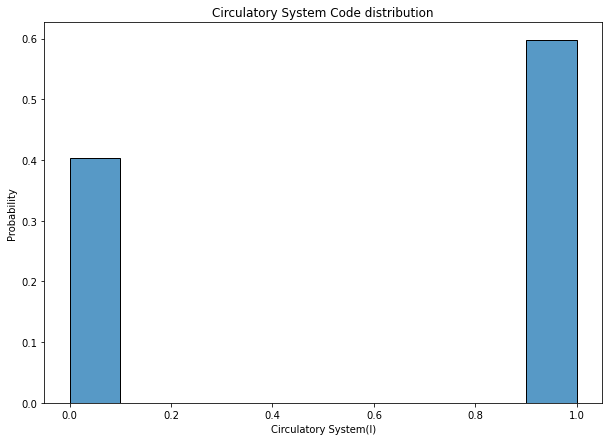

In [8]:
plt.figure(figsize = (10, 7))
sns.histplot(x ='Circulatory System(I)',bins=10, stat='probability', data = df)
plt.title('Circulatory System Code distribution')


### Percentage of Heart Disease


In [9]:
# Heart Disease 

No_heart_disease = len(df[df['Circulatory System(I)'] == 0])
heart_disease = len(df[df['Circulatory System(I)'] > 0])

print("Percentage of Patients Don't Have Heart Disease: {:.2f}%".format
                                          ((No_heart_disease / (len(df['Circulatory System(I)']))*100)))
      
print("Percentage of Patients Have Heart Disease: {:.2f}%".format
                                          ((heart_disease / (len(df['Circulatory System(I)']))*100)))

Percentage of Patients Don't Have Heart Disease: 40.31%
Percentage of Patients Have Heart Disease: 59.69%


#### Heart Disease Frequency for differetn gender in 2019

Text(0.5, 1.0, 'Heart Disease Frequency for Sex')

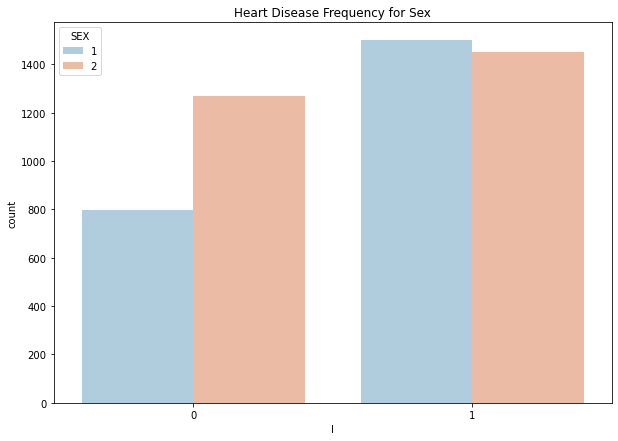

In [10]:
plt.figure(figsize = (10, 7))
sns.countplot(x = 'I', hue='SEX',palette='RdBu_r', data = df)
plt.title('Heart Disease Frequency for Sex')

#### Heart Disease Frequency for differetn gender in 2020

Text(0.5, 1.0, 'Circulatory System Distribution Frequency for Sex')

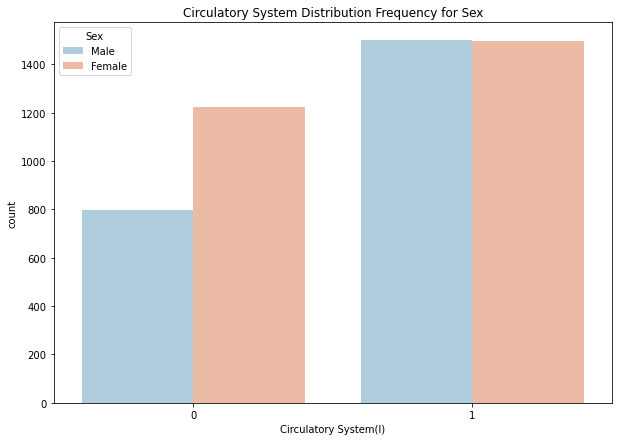

In [15]:
plt.figure(figsize = (10, 7))
ax = sns.countplot(x = 'Circulatory System(I)', hue='SEX', palette='RdBu_r', data = df)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Male', 'Female'],
         title = 'Sex')
plt.title('Circulatory System Distribution Frequency for Sex')

## Patient Diagnosis with Different Disease

In [399]:
col_names = ['Infectious And Parastic Disease(A & B)', 
             'Neoplasms(C)',
             'Neoplasms Blood-forming Organs(D)',
             'Endocrine Nutritional Metabolic(E)', 
             'Mental Behavioral Disorders(F)',
             'Nervous System(G)', 'Eye Adnexa, Ear and Mastoid(H)',
             #'Circulatory System(I)', 
             'Respiratory System(J)', 'Digestive System(K)',
             'Skin and Connective Tissue(L)',
             'musculoskeletal and Connective Tissue(M)', 'Genitourinary System(N)',
             'Pregancy, Childbirth(O)',
             'Conditions Originating in the Perinatal Period(P)',
             'Congenital Malformations, Deformations(Q)',
             'Symptoms, Signs, Lab Findings(R)', 'Injury, Poisoning(S, T)',
             'Emergency code additions(U)',
             'External Causes of Morbidity(V, W, X, Y)',
             'Factors Influencing Health Status (Z)']


cat_colors = ['RdBu_r','coolwarm','vlag', 'autumn_r',
              'RdBu',  'icefire_r','Set2', 'viridis_r', 
              'summer','nipy_spectral','viridis', 'rocket' ]

In [400]:
# df.columns

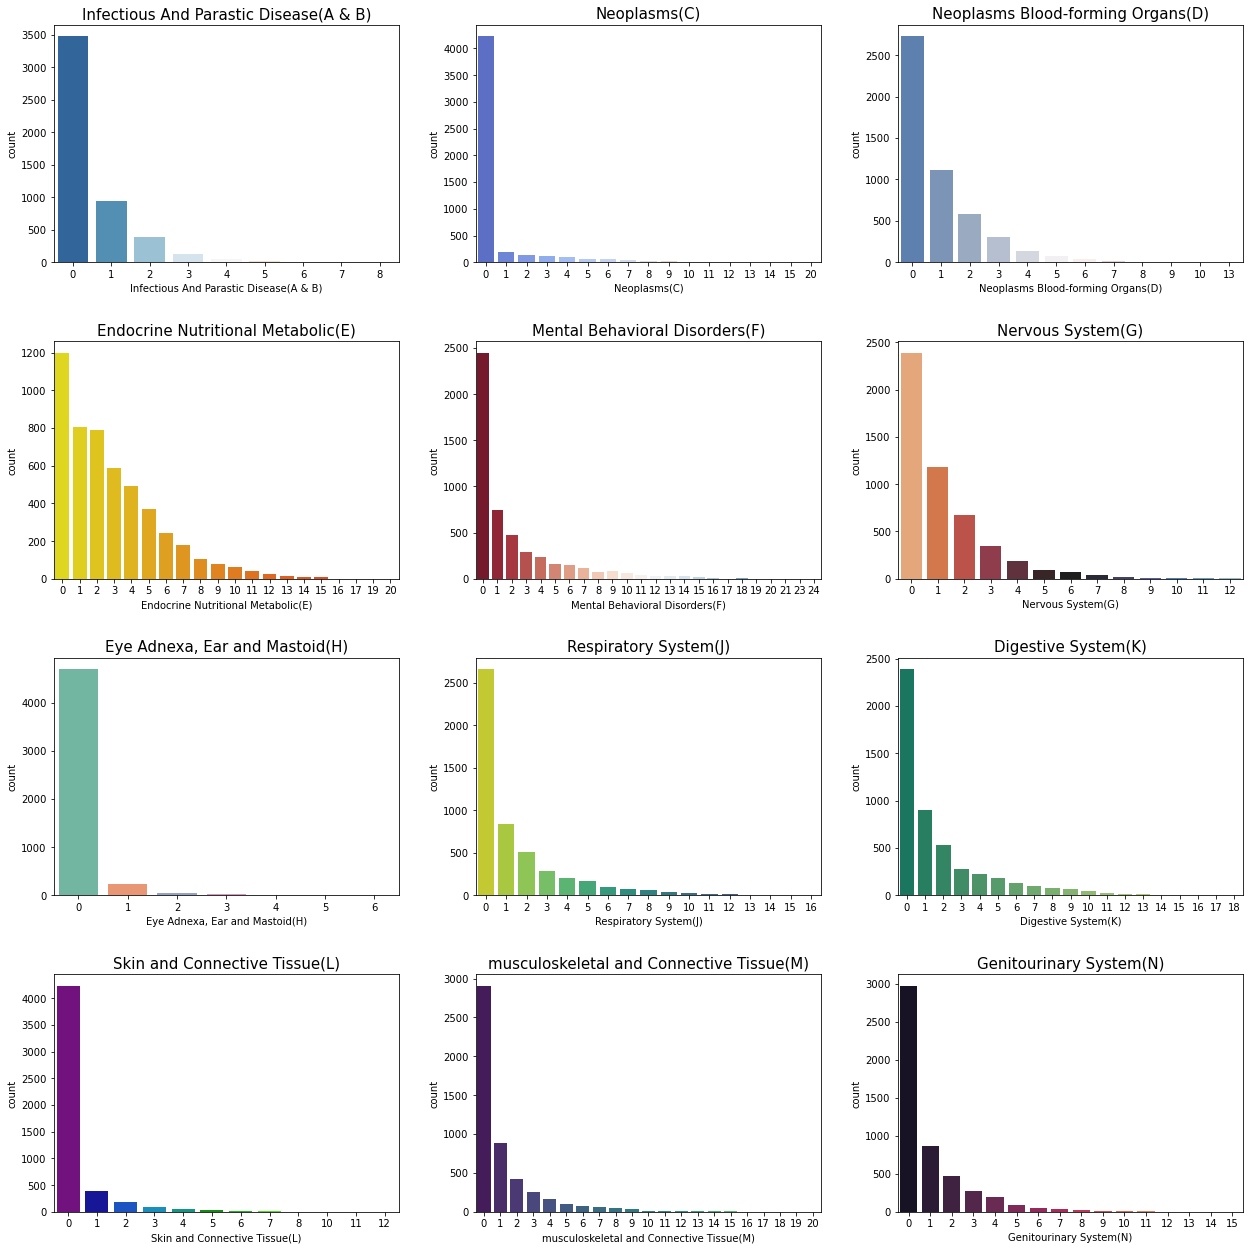

In [401]:
fig, axes = plt.subplots(4,3, figsize=(18,18))
position = 0

for row in range(4):
    for col in range(3):
        
        axes[row, col].set_title(col_names[position],fontdict={'fontsize': 15})
        
        sns.countplot(x=col_names[position],
                      palette = cat_colors[position], 
                      #edgecolor = sns.color_palette(cat_colors[position], 4),
                      linewidth=1,
                      ax = axes[row,col],
                      data=df)
        
     
        
        position+= 1
        
plt.subplots_adjust(hspace=0.9)
plt.tight_layout(pad=3);

## Correlation

In [38]:
df = df.drop(columns = ['YEAR_x', 'YEAR_y'])

<AxesSubplot:>

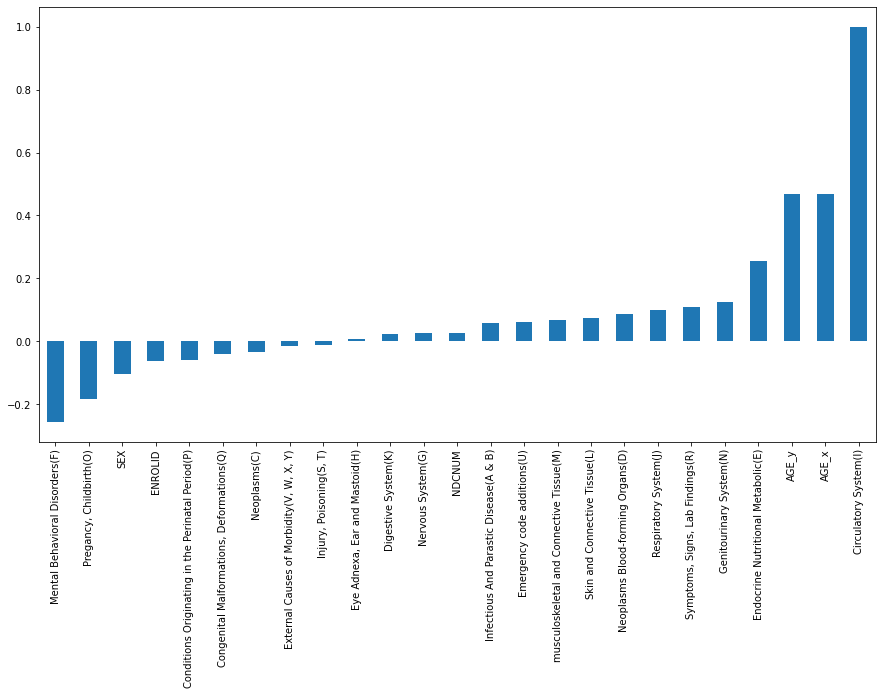

In [40]:
plt.figure(figsize=(15, 8))
df.corr()['Circulatory System(I)'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

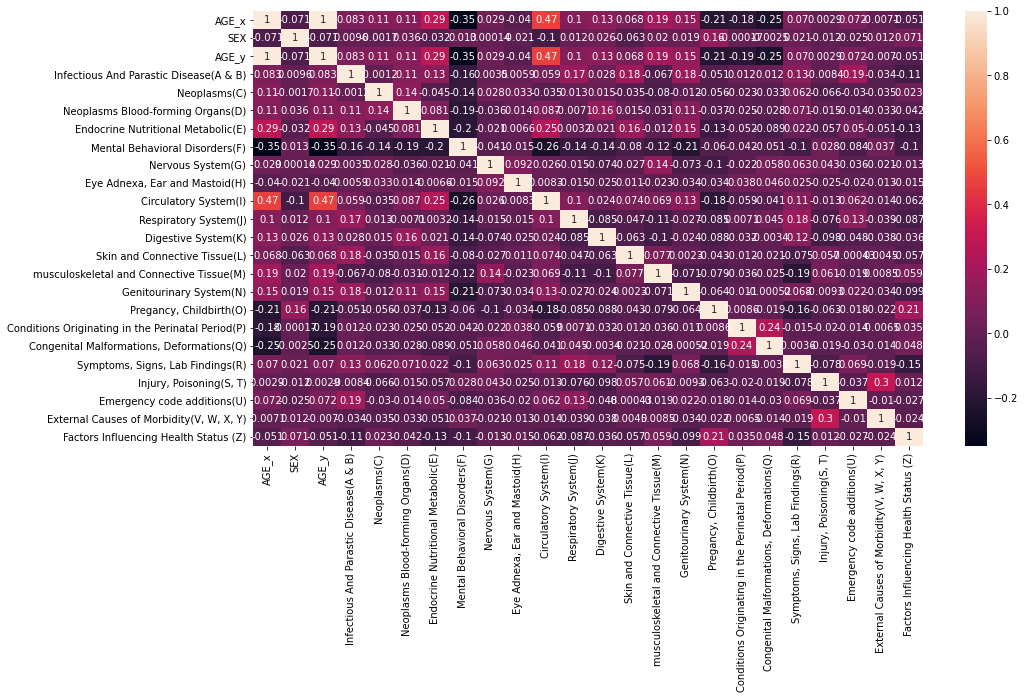

In [414]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.drop(columns=['ENROLID', 'YEAR_x', 'YEAR_y', 'NDCNUM']).corr(), annot=True)

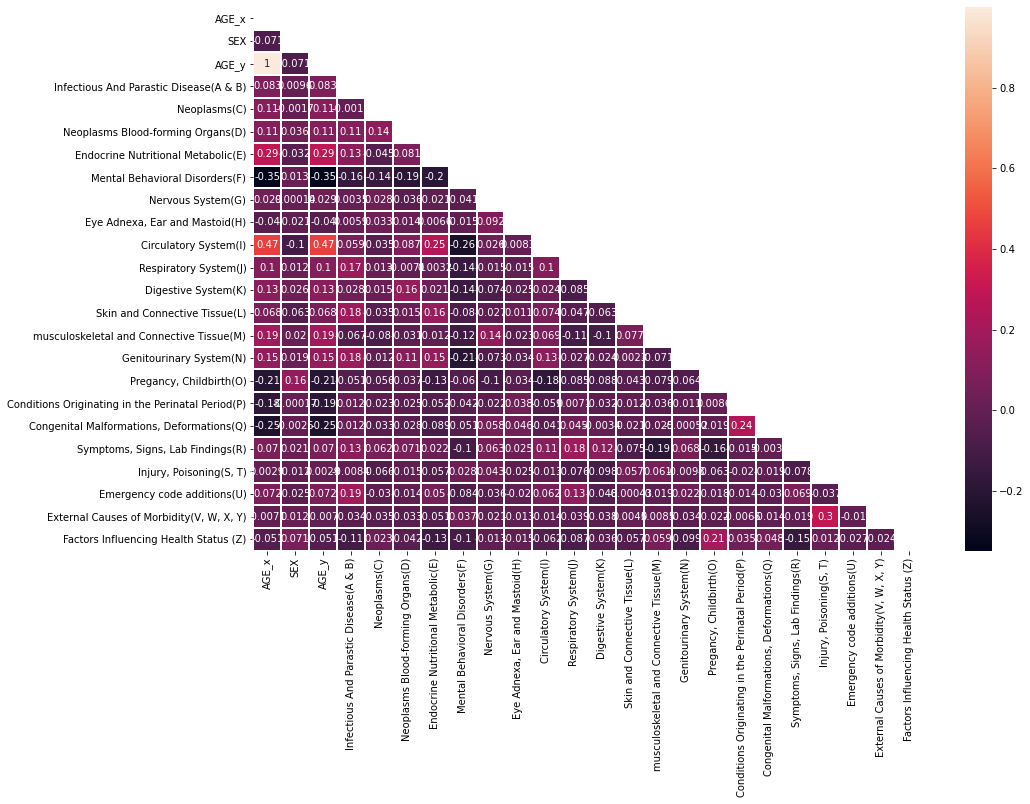

In [413]:
plt.figure(figsize=(15,10))
sns.heatmap(df.drop(columns=['ENROLID', 'YEAR_x', 'YEAR_y', 'NDCNUM']).corr(), 
            mask=np.triu(df.drop(columns=['ENROLID', 'YEAR_x', 'YEAR_y', 'NDCNUM']).corr()), 
            annot=True,linewidth=2)
plt.show()


In [42]:

print (df.corr()['Circulatory System(I)'].abs().sort_values())

Eye Adnexa, Ear and Mastoid(H)                       0.008285
Injury, Poisoning(S, T)                              0.012878
External Causes of Morbidity(V, W, X, Y)             0.014467
Digestive System(K)                                  0.023566
Nervous System(G)                                    0.025570
NDCNUM                                               0.026079
Neoplasms(C)                                         0.034547
Congenital Malformations, Deformations(Q)            0.041373
Conditions Originating in the Perinatal Period(P)    0.059004
Infectious And Parastic Disease(A & B)               0.059124
ENROLID                                              0.060658
Factors Influencing Health Status (Z)                0.061712
Emergency code additions(U)                          0.062392
musculoskeletal and Connective Tissue(M)             0.068846
Skin and Connective Tissue(L)                        0.074390
Neoplasms Blood-forming Organs(D)                    0.086920
Respirat